# Network Visualization Next Data

In [2]:
# Required packages
# This will install the packages only if are missing
if (!require("igraph")) install.packages("igraph")
if (!require("intergraph")) install.packages("intergraph")
if (!require("statnet")) install.packages("statnet")
if (!require("scales")) install.packages("scales")
if (!require("beepr")) install.packages("beepr")

## Data Preparation
 This section:  
 - Reads in the data frame  
 - Creates a unique labels' dataframe to feed into the graph object as the nodes/vertices list  
 - Creates a link's dataframe:   
     - "Center" is taken as the "From" node  
     - "Answer" is taken as the "To" node 
     - All nodes are directed

In [3]:
# load data
d_raw <- read.csv(file="data/animal_random_merged.csv", header=TRUE, sep=",") 

In [4]:
# create node list of unique labels
nodes <- data.frame(unique(d_raw$Center)) 
# change colname Label
nodes <- setNames(nodes, c("Label")) 
# vectors to pick
myvars <- c("Center", "Answer") 
# pick "Center" and "Answer" vectors 
links <- d_raw[myvars]  
# add vector "Type" of link 
links$Type <- rep(c("Directed"), times = length(links$Center)) 
# change col names for graph object
links <- setNames(links, c("From", "To", "Type")) 

In [5]:
# check
head(nodes)
head(links)

Label
alligator
elk
whale
clam
goat
camel


From,To,Type
alligator,rattlesnake,Directed
elk,vulture,Directed
whale,moose,Directed
clam,panda,Directed
goat,ant,Directed
camel,salamander,Directed


## Creating network object

In [6]:
library(igraph)
library(scales)

In [7]:
# we need to pass "link" as edges to "d" and "nodes" as vertices to "Vertices"
# we also set "directed" to true ("T")
net <- graph_from_data_frame(d=links, vertices=nodes, directed=T) # new igraph-network object
E(net) # edges
V(net) # vertices

+ 9928/9928 edges from 9297b1b (vertex names):
 [1] alligator  ->rattlesnake  elk        ->vulture     
 [3] whale      ->moose        clam       ->panda       
 [5] goat       ->ant          camel      ->salamander  
 [7] ox         ->polar bear   hyena      ->fowl        
 [9] muskrat    ->cockroach    mule       ->wolf        
[11] rat        ->chicken      walrus     ->heron       
[13] hornet     ->chicken      rooster    ->shrew       
[15] clam       ->pelican      armadillo  ->buzzard     
[17] swan       ->gerbil       alpaca     ->clam        
[19] lamb       ->wildebeest   bison      ->spider      
+ ... omitted several edges

+ 217/217 vertices, named, from 9297b1b:
  [1] alligator       elk             whale           clam           
  [5] goat            camel           ox              hyena          
  [9] muskrat         mule            rat             walrus         
 [13] hornet          rooster         armadillo       swan           
 [17] alpaca          lamb            bison           marten         
 [21] spider          cardinal        musk ox         prairie dog    
 [25] tadpole         gnat            moth            butterfly      
 [29] vulture         anemone         mouse           woodpecker     
 [33] crane           bird            panda           wallaby        
 [37] chickadee       deer            mare            tasmanian devil
+ ... omitted several vertices

## Five-number summary

In [8]:
library(intergraph)
library(statnet)

In [9]:
# We first need to coerce the igraph object to a statnet network object
net.n <- asNetwork(net)

In [10]:
# Size: number of nodes
network.size(net.n)
## Size: 217 ##

[1] 217

In [11]:
# Density: proportion of observed ties of the maximum number of possible ties.
gden(net.n)
## Density: 0.21178955453149 ##

[1] 0.2117896

In [12]:
# Components: is a subgroup in which all actors are connected, directly or indirectly. 

#Find strong components
comp = components(net.n,connected="strong")
# check help(component.dist) for details about how components are identified
# Components: 2

Node 1, Reach 216, Total 216
Node 2, Reach 216, Total 432
Node 3, Reach 216, Total 648
Node 4, Reach 216, Total 864
Node 5, Reach 216, Total 1080
Node 6, Reach 216, Total 1296
Node 7, Reach 216, Total 1512
Node 8, Reach 216, Total 1728
Node 9, Reach 216, Total 1944
Node 10, Reach 216, Total 2160
Node 11, Reach 216, Total 2376
Node 12, Reach 216, Total 2592
Node 13, Reach 216, Total 2808
Node 14, Reach 216, Total 3024
Node 15, Reach 216, Total 3240
Node 16, Reach 216, Total 3456
Node 17, Reach 216, Total 3672
Node 18, Reach 216, Total 3888
Node 19, Reach 216, Total 4104
Node 20, Reach 216, Total 4320
Node 21, Reach 216, Total 4536
Node 22, Reach 216, Total 4752
Node 23, Reach 216, Total 4968
Node 24, Reach 216, Total 5184
Node 25, Reach 216, Total 5400
Node 26, Reach 216, Total 5616
Node 27, Reach 216, Total 5832
Node 28, Reach 216, Total 6048
Node 29, Reach 216, Total 6264
Node 30, Reach 216, Total 6480
Node 31, Reach 216, Total 6696
Node 32, Reach 216, Total 6912
Node 33, Reach 216, T

In [13]:
# Diameter (geodesic distance): is the longest of the shortest paths across all pairs of nodes
# Is measure of compactness
lgc <- component.largest(net.n,result="graph")
gd <- geodist(lgc)
max(gd$gdist)
## Diameter: 3 ##

Node 1, Reach 216, Total 216
Node 2, Reach 216, Total 432
Node 3, Reach 216, Total 648
Node 4, Reach 216, Total 864
Node 5, Reach 216, Total 1080
Node 6, Reach 216, Total 1296
Node 7, Reach 216, Total 1512
Node 8, Reach 216, Total 1728
Node 9, Reach 216, Total 1944
Node 10, Reach 216, Total 2160
Node 11, Reach 216, Total 2376
Node 12, Reach 216, Total 2592
Node 13, Reach 216, Total 2808
Node 14, Reach 216, Total 3024
Node 15, Reach 216, Total 3240
Node 16, Reach 216, Total 3456
Node 17, Reach 216, Total 3672
Node 18, Reach 216, Total 3888
Node 19, Reach 216, Total 4104
Node 20, Reach 216, Total 4320
Node 21, Reach 216, Total 4536
Node 22, Reach 216, Total 4752
Node 23, Reach 216, Total 4968
Node 24, Reach 216, Total 5184
Node 25, Reach 216, Total 5400
Node 26, Reach 216, Total 5616
Node 27, Reach 216, Total 5832
Node 28, Reach 216, Total 6048
Node 29, Reach 216, Total 6264
Node 30, Reach 216, Total 6480
Node 31, Reach 216, Total 6696
Node 32, Reach 216, Total 6912
Node 33, Reach 216, T

[1] 3

In [14]:
# Clustering coefficient: is the presence of clustering, or the tendency to formed closed triangles

#we first need to check if the network is multiplex 
# (multiple directed edges between a pir of nodes)
is.multiplex(net.n)

[1] TRUE

In [15]:
# It is, so let's remove loops and multiple edges to simplify the net
net.s <- simplify(net, remove.multiple = T, remove.loops = T)

In [16]:
# Let's coerce the igraph object to a statnet network object again
net.n.s <- asNetwork(net.s)

In [17]:
# Now use gtrans to compute diamater
gtrans(net.n.s,mode="graph")
## Diameter: 0.198555000965171 ##

[1] 0.198555

In [18]:
#################
### Basic Summary
#################
## Size:       217  ##
## Density:    0.21 ##
## Components: 2    ##
## Diameter:   3    ##
## Clustering: 0.19 ##

## Basic Network plotting 

In [19]:
library(scales)
library(beepr)

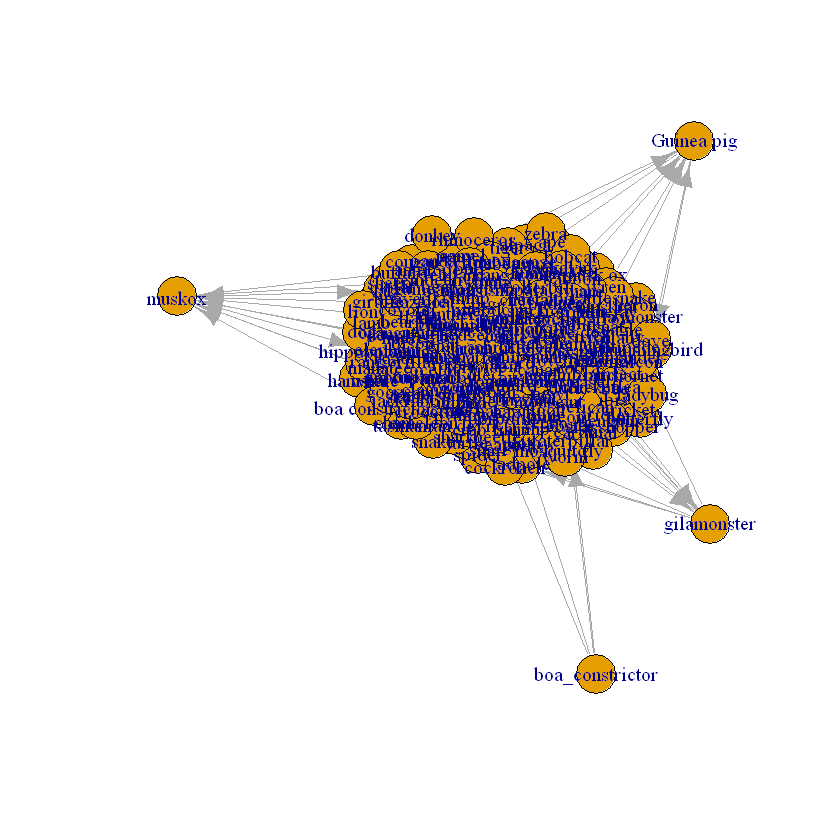

In [20]:
# First raw plot
plot(net.s)

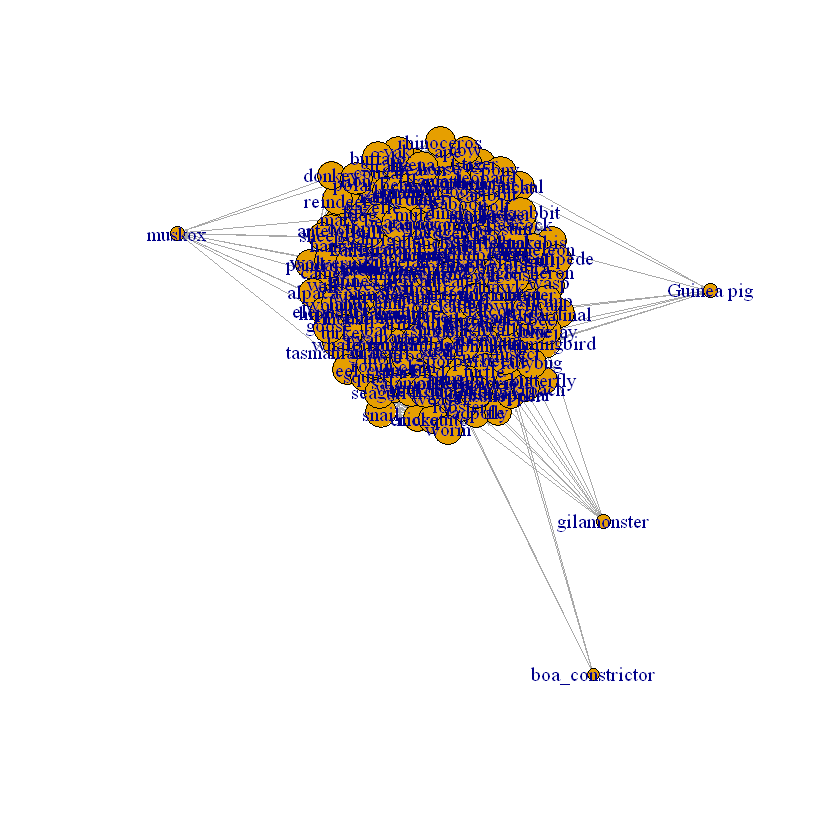

In [21]:
# Compute node degrees (#links) and use that to set node size:
deg <- degree(net.n.s)
deg <- rescale(deg, to = c(5, 15)) # resize node size 
V(net.s)$size <- deg
plot(net.s, edge.arrow.size=.1) # reduce arrow size

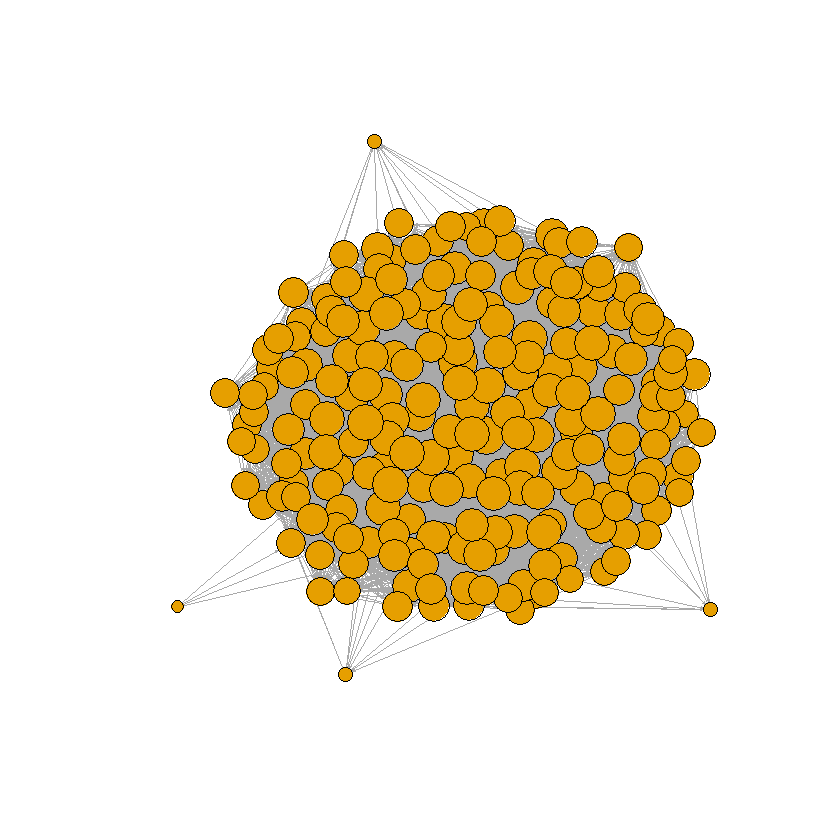

In [22]:
# Let's remove labels from the graph to see how it looks
lk = layout.kamada.kawai(net.s) # create a tree like layout
plot(net.s, edge.arrow.size=.1,vertex.label=NA, layout = lk)

## Community detection

In [23]:
# cluster edge betweenness
# The idea of the edge betweenness based community structure detection 
# is that it is likely that edges connecting separate modules have high 
# edge betweenness as all the shortest paths from one module to another 
# must traverse through them.

# This may take a minute to run...
clp_e <- cluster_edge_betweenness(net.s)
beep(sound = 8) # sound when finish

In [24]:
# cluster random walk
# This function tries to find densely connected subgraphs, also called 
# communities in a graph via random walks. The idea is that short random
# walks tend to stay in the same community.

# Note: this works only for undirected graphs, hence, it will ignore 
# edge direction

clp_r <- cluster_walktrap(net.s)
beep(sound = 2) # sund when finish

In [25]:
# The cluster function returns a community object
class(clp_e)
class(clp_r)

[1] "communities"

[1] "communities"

In [26]:
# number of communities detected by each algorithm
length(clp_e) 
length(clp_r) 

[1] 24

[1] 4

In [27]:
# here we can check the community at which each node was assigned 
head(clp_e$membership) 
head(clp_r$membership) 

[1] 1 2 3 4 2 5

[1] 2 2 2 1 2 2

In [28]:
# how modular the graph partitioning is
# High modularity for a partitioning reflects dense connections within 
# communities and sparse connections across communities.

modularity(clp_e)
modularity(clp_r)

[1] 0.000674628

[1] 0.07381853

In [29]:
###############
# Basic Summary
###############
# Edge betweenness ##
# Communities: 24
# Modularity: 0.00067
#####################
# Random trap (walk)#
# Communities: 4
# Modularity: 0.07381
#####################

# IMPORTANT: There is massive difference between detecting communties
# by a random walk that assumes undirected edges, and edge_betweenness
# that works with directed edges

## Better plotting

In [30]:
# create a tree like layout
lk = layout.kamada.kawai(net.s) 

In [31]:
# Let's create a color pallete for edge_betweenness communities

prettyColors <- rainbow(length(clp_e), alpha = 0.7)
communityColors_e <- prettyColors[membership(clp_e)]

# Let's create a color pallete for random_walk_trap communities
prettyColors <- rainbow(length(clp_r), alpha = 0.7)
communityColors_r <- prettyColors[membership(clp_r)]

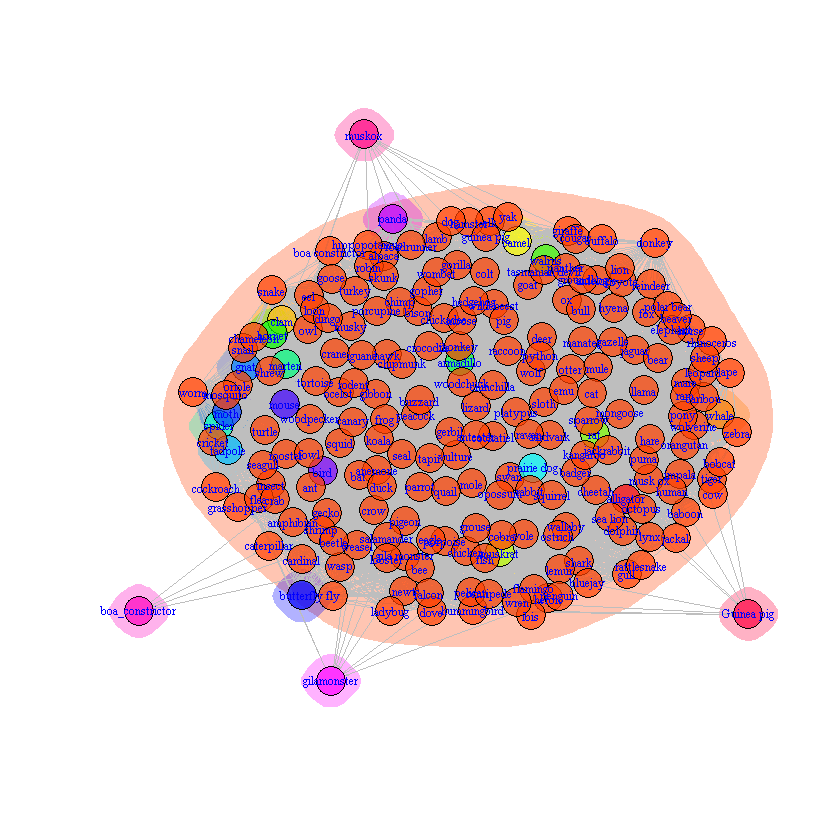

In [32]:
## GRAPH 1 ##

# Let's plot the edge_betweenness result with lk layout
# Note: since there are communities of "1" or very few nodes, the layout.fruchterman.reingold
# won't work well

set.seed(28) # set seed for reproducibility

plot(clp_e, net.s, edge.width = 0.1, mark.border=NA, vertex.label.cex=0.6, 
     vertex.label.color="blue", vertex.size = 10, edge.arrow.size=0.1, 
     edge.color = "Grey", col = communityColors_e, layout= lk, asp =0)

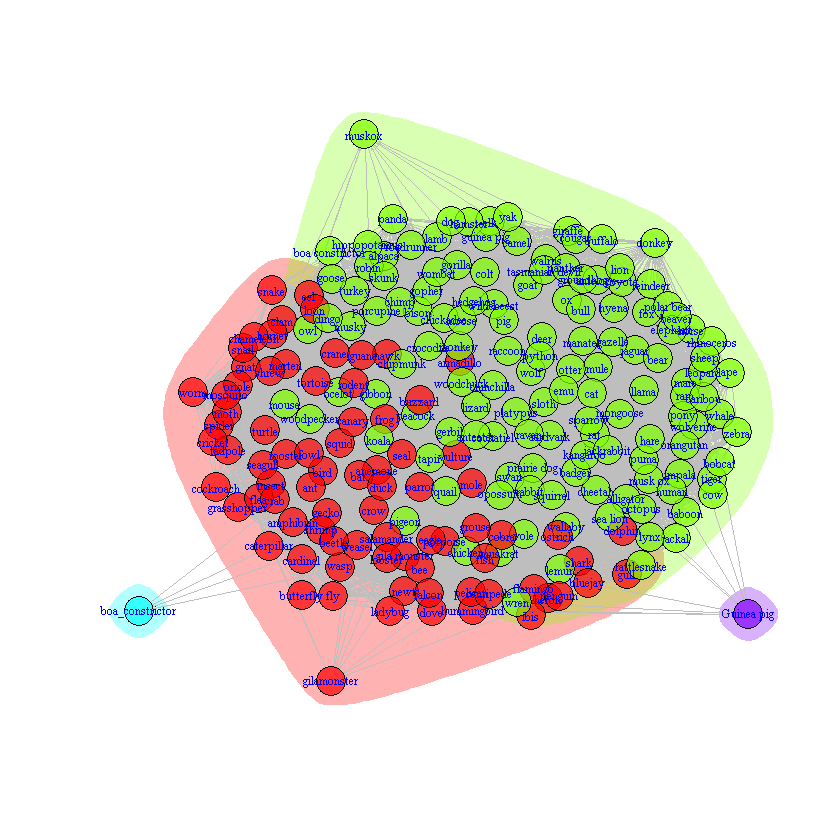

In [33]:
## GRAPH 2 ##

# Let's plot the random_walk_trap result with lk layout
# Note: since there are communities of "1" or very few nodes, the layout.fruchterman.reingold
# won't work well

set.seed(28) # set seed for reproducibility

plot(clp_r, net.s, edge.width = 0.1, mark.border=NA, vertex.label.cex=0.6, 
     vertex.label.color="blue", vertex.size = 10, edge.arrow.size=0.1, 
     edge.color = "Grey", col = communityColors_r, layout= lk, asp =0)

In [34]:
## Plot out GRAPH 1 ##
set.seed(28) # set seed for reproducibility

tiff("plot_next_animal_eb.tiff", width =5, height = 5, units = 'in', res = 300, compression = 'none')

plot(clp_e, net.s, edge.width = 0.1, mark.border=NA, vertex.label.cex=0.5, 
     vertex.label.color="blue", vertex.size = 10, edge.arrow.size=0.1, 
     edge.color = "Grey", col = communityColors_e, layout= lk, asp =0)

dev.off()

png 
  2

In [35]:
## Plot out GRAPH 2 ##
set.seed(28) # set seed for reproducibility

tiff("plot_next_animal_rw.tiff", width =5, height = 5, units = 'in', res = 300, compression = 'none')

plot(clp_r, net.s, edge.width = 0.1, mark.border=NA, vertex.label.cex=0.5, 
     vertex.label.color="blue", vertex.size = 10, edge.arrow.size=0.1, 
     edge.color = "Grey", col = communityColors_r, layout= lk, asp =0)

dev.off()

png 
  2